# MLC60 - NLP Case Study - Automatic Ticket Classification

**Group Facilitator:**
- **Name:**  Shantanu Saxena
- **Email ID:**  ssaxen@outlook.com

**Team Member Detail:**
- **Name:**  Badari Prasad H
- **Email ID:**  badari.hp@gmail.com
 


## Understanding Problem Statement 

For a financial company, customer complaints carry a lot of importance, as they are often an indicator of the shortcomings in their products and services. If these complaints are resolved efficiently in time, they can bring down customer dissatisfaction to a minimum and retain them with stronger loyalty. This also gives them an idea of how to continuously improve their services to attract more customers. 

 

These customer complaints are unstructured text data; so, traditionally, companies need to allocate the task of evaluating and assigning each ticket to the relevant department to multiple support employees. This becomes tedious as the company grows and has a large customer base.

 

In this case study, you will be working as an NLP engineer for a financial company that wants to automate its customer support tickets system. As a financial company, the firm has many products and services such as credit cards, banking and mortgages/loans. 

## **Business goal**


We need to build a model that is able to classify customer complaints based on the products/services. By doing so, we can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

We will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, we need to apply NMF to analyze patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 

With the help of topic modelling, we will be able to map each ticket onto its respective department/category. We can then use this data to train any supervised model such as logistic regression, decision tree, or random forest. Using this trained model, we can classify any new customer complaint support ticket into its relevant department.

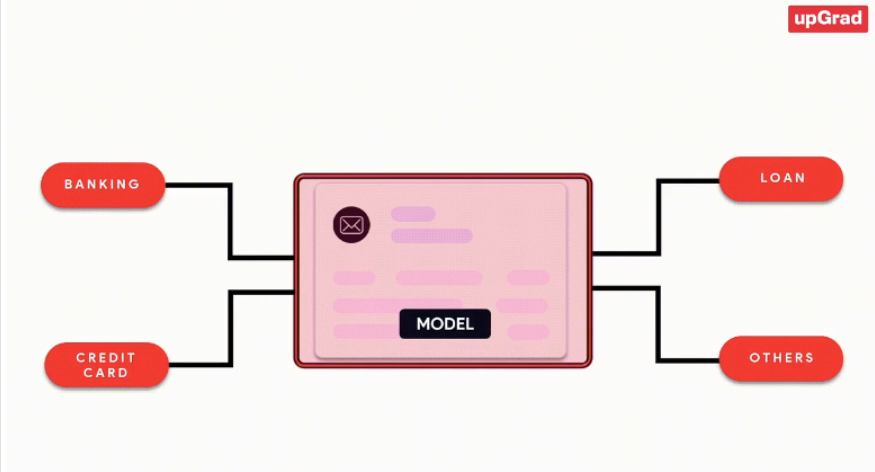

## Pipelines that needs to be performed:

We shall perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
# Import necessary libraries
import json  # For working with JSON data
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import re  # For regular expressions
import spacy  # For advanced natural language processing tasks
import string  # For string operations

# Download the English language model for spaCy
import en_core_web_sm
nlp = en_core_web_sm.load()

# Data visualization libraries
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots and charts


# Python library for working with human language data
import nltk  # Import the Natural Language Toolkit library
nltk.download('stopwords')  # Download the stopwords dataset from NLTK
from nltk.stem import WordNetLemmatizer  # Import the WordNet Lemmatizer module for lemmatization
from nltk.corpus import wordnet, stopwords  # Import WordNet and stopwords modules from NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


# Plotly libraries for interactive visualizations
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# Feature extraction and transformation libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Pretty print library
from pprint import pprint

# Command to display matplotlib plots inline in Jupyter Notebook
%matplotlib inline

# progress bar for loops and other iterable processes
from tqdm import tqdm 

#Warning handlings
import warnings as warnings  # Import the warnings module and alias it as "warnings"
warnings.filterwarnings("ignore")  # Filter out warnings to ignore them during runtime

#Set max col width and display
pd.set_option('display.max_colwidth', 350)
pd.set_option('display.max_columns', None)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shantanusaxena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shantanusaxena/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shantanusaxena/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shantanusaxena/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
import os
IS_GOOGLE_COLAB=False

# Check for a Colab environment
if 'COLAB_GPU' in os.environ:
    IS_GOOGLE_COLAB=True

if IS_GOOGLE_COLAB :
    print("This is running on Google Colab.")    
else:
    print("This is not running on Google Colab.")

This is not running on Google Colab.


## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [4]:
# Opening JSON file 
if IS_GOOGLE_COLAB:
    file_path = open('/content/gdrive/MyDrive/Upgrad/complaints-2021-05-14_08_16.json')  
else :
    file_path = open('complaints-2021-05-14_08_16.json')

# Returns JSON object as a dictionary 
data = json.load(file_path)
df = pd.json_normalize(data)

## Data preparation

In [5]:
# Inspect the dataframe to understand the given data.
# Set pandas option to display all columns without truncation
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [6]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

### <span style="color:grey">Observation:</span>

- JSON file was converted into DataFrame and data reading was done successfully. 
- Did glanced at the data for quick overview.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [8]:
# Print the column names
def print_column_names():
    i = 1
    for col in df.columns:
        print(str("{:02d}".format(i)) +" Col:\033[1m", col, '\033[0m')
        i += 1
        
print_column_names()

01 Col: _index 
02 Col: _type 
03 Col: _id 
04 Col: _score 
05 Col: _source.tags 
06 Col: _source.zip_code 
07 Col: _source.complaint_id 
08 Col: _source.issue 
09 Col: _source.date_received 
10 Col: _source.state 
11 Col: _source.consumer_disputed 
12 Col: _source.product 
13 Col: _source.company_response 
14 Col: _source.company 
15 Col: _source.submitted_via 
16 Col: _source.date_sent_to_company 
17 Col: _source.company_public_response 
18 Col: _source.sub_product 
19 Col: _source.timely 
20 Col: _source.complaint_what_happened 
21 Col: _source.sub_issue 
22 Col: _source.consumer_consent_provided 


### <span style="color:grey">Observation:</span>

- Total rows: 78313
- Total columns: 22
- Few of the columns have null values
- Most of the column names start with '_', which we will rename to improve readability and usability.


In [9]:
# Assign new column names
new_columns = {}
for col in df.columns:
    new_columns[col] = re.sub("^_", "", col).replace("source.", "")

df.rename(columns = new_columns, inplace = True)

print_column_names()

01 Col: index 
02 Col: type 
03 Col: id 
04 Col: score 
05 Col: tags 
06 Col: zip_code 
07 Col: complaint_id 
08 Col: issue 
09 Col: date_received 
10 Col: state 
11 Col: consumer_disputed 
12 Col: product 
13 Col: company_response 
14 Col: company 
15 Col: submitted_via 
16 Col: date_sent_to_company 
17 Col: company_public_response 
18 Col: sub_product 
19 Col: timely 
20 Col: complaint_what_happened 
21 Col: sub_issue 
22 Col: consumer_consent_provided 


In [10]:
# Get the shape and size of the dataset
print('no. of rows:\033[1m', df.shape[0], '\033[0m')
print('no. of cols:\033[1m', df.shape[1], '\033[0m')

no. of rows: 78313 
no. of cols: 22 


In [11]:
# Assign nan in place of blanks in the complaints column
df.complaint_what_happened.replace(r'', np.nan, regex=True, inplace=True)

In [12]:
# lets check the nan complaints
df.complaint_what_happened.isnull().sum()

57241

In [13]:
# lets check the empty string complaints
len(df[df['complaint_what_happened']==''])

0

In [14]:
#Assign nan in place of blanks in the complaints column
# lets replace empty complain with nan value
df[df['complaint_what_happened']==''] = np.nan
df.complaint_what_happened.isnull().sum()

57241

In [15]:
# Remove all rows where complaints column is nan
df = df[df.complaint_what_happened.notna()]
print('No. of Remaining Rows:\033[1m', len(df), '\033[0m')

No. of Remaining Rows: 21072 


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21072 entries, 1 to 78312
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      21072 non-null  object 
 1   type                       21072 non-null  object 
 2   id                         21072 non-null  object 
 3   score                      21072 non-null  float64
 4   tags                       3816 non-null   object 
 5   zip_code                   16427 non-null  object 
 6   complaint_id               21072 non-null  object 
 7   issue                      21072 non-null  object 
 8   date_received              21072 non-null  object 
 9   state                      20929 non-null  object 
 10  consumer_disputed          21072 non-null  object 
 11  product                    21072 non-null  object 
 12  company_response           21072 non-null  object 
 13  company                    21072 non-null  object 


### <span style="color:grey">Observation:</span>

- Shape and size of the dataset
    - No of rows initially: **78313**
    - No of cols: **22**
- Rows after complaint_what_happened nan removed
    - Remaining Rows: **21072**


## Prepare the text for topic modeling

We have removed all the blank complaints, we need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once we have done these cleaning operations we shall perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [17]:
# Function to clean the text and remove all the unnecessary elements.
def cleaned_text(sentence):
    # Convert the text to lowercase
    sentence = sentence.lower()

    # Remove text in square brackets
    sentence = re.sub("[\[].*?[\]]", "", sentence)
    
    # Remove punctuation
    sentence = re.sub(r'[^\w\s]','', sentence)
    
    # Remove digits
    sentence = re.sub(r'[0-9]', '', sentence, re.I|re.A)
    
    # Return the cleaned sentence
    return sentence


## Data Lemmatizer

In [18]:
# Function to Lemmatize the texts

# Create a set of English stopwords
stop = set(stopwords.words('english'))


# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()  


# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):    #indicates that the word is an adjective.
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):  #indicates that the word is a verb
        return wordnet.VERB
    elif nltk_tag.startswith('N'):  #indicates that the word is a noun
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):  #indicates that the word is an adverb
        return wordnet.ADV
    else:          
        return None

def lemmatized_text(sentence):
    # tokenize into words
    words = nltk.word_tokenize(sentence)
    
    # remove stop words (this is optional but generally done)
    words = [word for word in words if word not in stopwords.words("english")]
    
    # tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(words)
    
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [19]:
# Dataframe('df_clean') will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame()

for x in tqdm(df.complaint_what_happened):
    df_clean = df_clean._append({'complaint_what_happened':x, 'lemmatized_complaints':lemmatized_text(cleaned_text(x))}, ignore_index=True)

100%|██████████| 21072/21072 [13:19<00:00, 26.35it/s]


In [20]:
df_clean.head(10)

,complaint_what_happened,lemmatized_complaints
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to v...,grand son give check deposit chase account fund clear chase bank close account never pay money say need speek grand son check clear money take chase bank refuse pay money grand son call chase time tell call verify check owner country time date happen xxxx check number xxxx claim number xxxx chase
5,Can you please remove inquiry,please remove inquiry
6,With out notice J.P. Morgan Chase restricted my account by my debit card Tuesday XX/XX/2019. On Thursday XX/XX/2019 I went into A branch after being advised by a customer service representative that my account would actually be closed. I went into the branch to see how I can remove the funds that are in there currently in as well as if my direc...,notice jp morgan chase restrict account debit card tuesday xxxx thursday xxxx go branch advise customer service representative account would actually close go branch see remove fund currently well direct deposit place employment would return bank associate customer service representative assure fund would post may take additional business day s...
7,"During the summer months, I experience a decline income due to my employment. Therefore, I request a one month payment extension with my Auto Loan Company, Chase. For the past almost fours years, my request for p

### <span style="color:grey">Observation:</span>

- `nltk_tag_to_wordnet_tag` function has converted NLTK POS tags to WordNet POS tags. This was done to lemmatize words
- `lemmatized_text` Has tokenized the sentence into words, removed stopwords, and tagged token with POS tag 
-  Lemmatized tokens were combined to create a lemmatized sentence.
-  df_clean has been created to include only the complaints and their lemmatized forms.

In [21]:
from textblob import TextBlob

tqdm.pandas()

# Write your function to extract the POS tags 
def extract_pos_tag(sentence):
    # Create a textblob object
    blob = TextBlob(sentence)
    
    # extract words with tags 'NN', join them and return
    return ' '.join([ word for (word,tag) in blob.tags if tag == "NN"])
    
df_clean["complaint_POS_removed"] = df_clean.progress_apply(lambda x: extract_pos_tag(x.lemmatized_complaints), axis=1)
df_clean["complaint_length"] = df_clean.progress_apply(lambda x: len(x.complaint_POS_removed), axis=1)

100%|██████████| 21072/21072 [00:00<00:00, 109249.46it/s]


### <span style="color:grey">Observation:</span>

- `textblob` this module is used for part-of-speech tagging
- `extract_pos_tag` extracted nouns (words with POS tag 'NN') from each sentence. 
- A new column titled "complaint_POS_removed" has been created, containing the extracted nouns for each complaint.
- A new column called "complaint_length" will store the length of the strings in the "complaint_POS_removed" column.

In [22]:
# The clean dataframe should now contain the raw complaint, lemmatized complaint 
# and the complaint after removing POS tags.
df_clean

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead,xxxx card tell agent date information order upgrade account change anniversary date consent xxxx record agent mislead,117
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,81
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information xxxx offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application xxxx request proceed application tell chase chase fact credit account ...,429
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to v...,grand son give check deposit chase account fund clear chase bank close account never pay money say need speek grand son check clear money take chase bank refuse pay money grand son call chase time tell call verify check owner country time date happen xxxx check number xxxx claim number xxxx chase,son check deposit chase account fund bank account money son check money bank refuse pay money son call time check owner country time date number claim number chase,163
...,...,...,...,...
210

### <span style="color:grey">Observation:</span>

- The cleaned dataframe now includes the raw complaint, the lemmatized complaint, the complaint after removing POS tags, and a column for the length of the complaint with POS tags removed.

## Exploratory data analysis to get familiar with the data.

*   Visualise the data according to the 'Complaint' character complaint_length.
*   Using a word cloud we shall find the top 40 words by frequency among all the articles after processing the text.
*   We will find the top unigrams, bigrams and trigrams by frequency among all the complaints after processing the text.

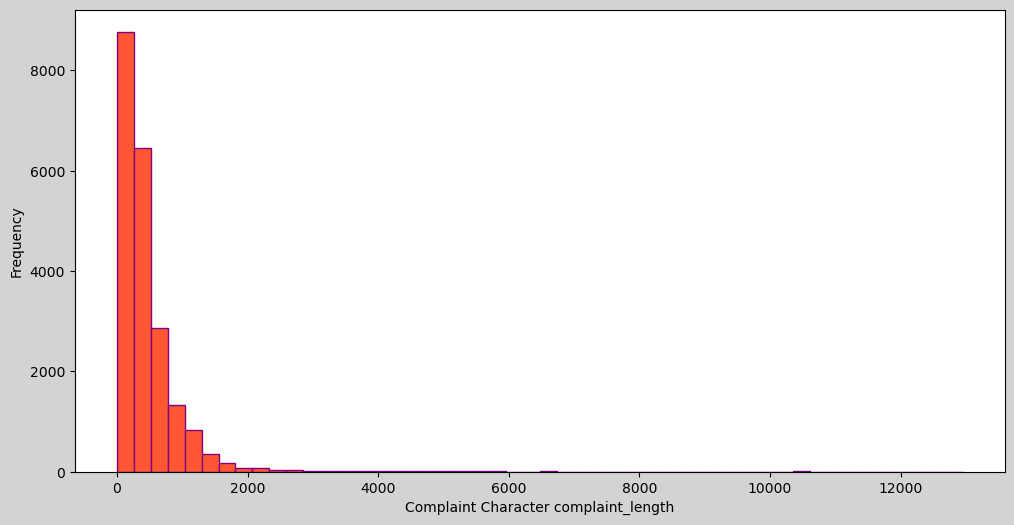

In [23]:
# Code to visualise the data according to the 'Complaint' character complaint_length
plt.figure(figsize=(12,6), facecolor='lightgray')
plt.hist(df_clean.complaint_length, bins=50, color='#FF5733', edgecolor='purple')
plt.xlabel("Complaint Character complaint_length")
plt.ylabel("Frequency")
plt.show()

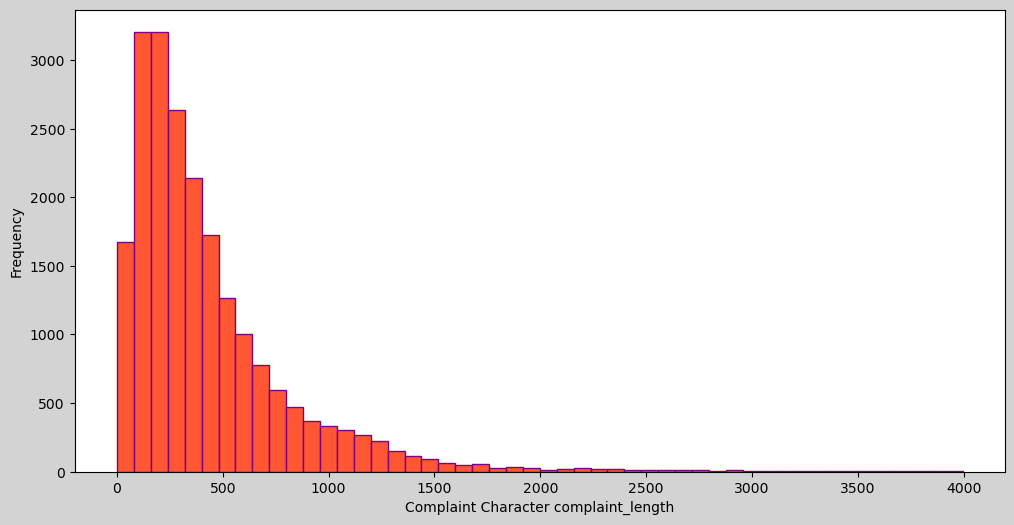

In [24]:
# Zoomed to see the figure upto 4000
plt.figure(figsize=(12,6), facecolor='lightgray')
plt.hist([l for l in df_clean.complaint_length if l < 4000], bins=50, color='#FF5733', edgecolor='purple')
plt.xlabel("Complaint Character complaint_length")
plt.ylabel("Frequency")
plt.show()

### <span style="color:grey">Observation:</span>

- Analyzed the frequency pattern based on 'Complaint Character complaint_length'.
- The density of complaints is highest between 100 and 600 characters.

#### Find the top 40 words by frequency among all the articles after processing the text.

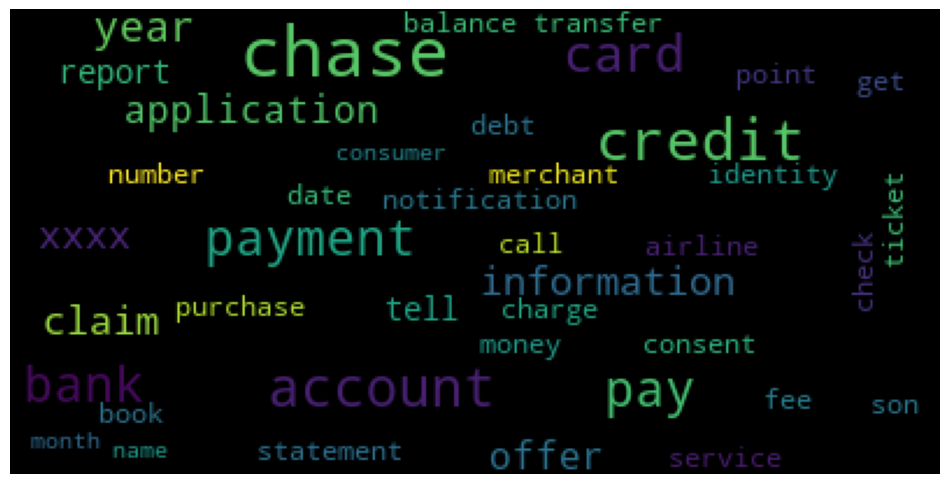

In [25]:
# Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

wordcloud = WordCloud(    stopwords=stop,
                          max_words=40,
                          max_font_size=30, 
                          random_state=42,
                          colormap='viridis'
                         ).generate(str(df_clean['complaint_POS_removed']))

fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### <span style="color:grey">Observation:</span>

- A WordCloud object was generated to identify the top 40 most frequent words across all articles, using the processed text data from the complaint_POS_removed column in the DataFrame.



In [26]:
# Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

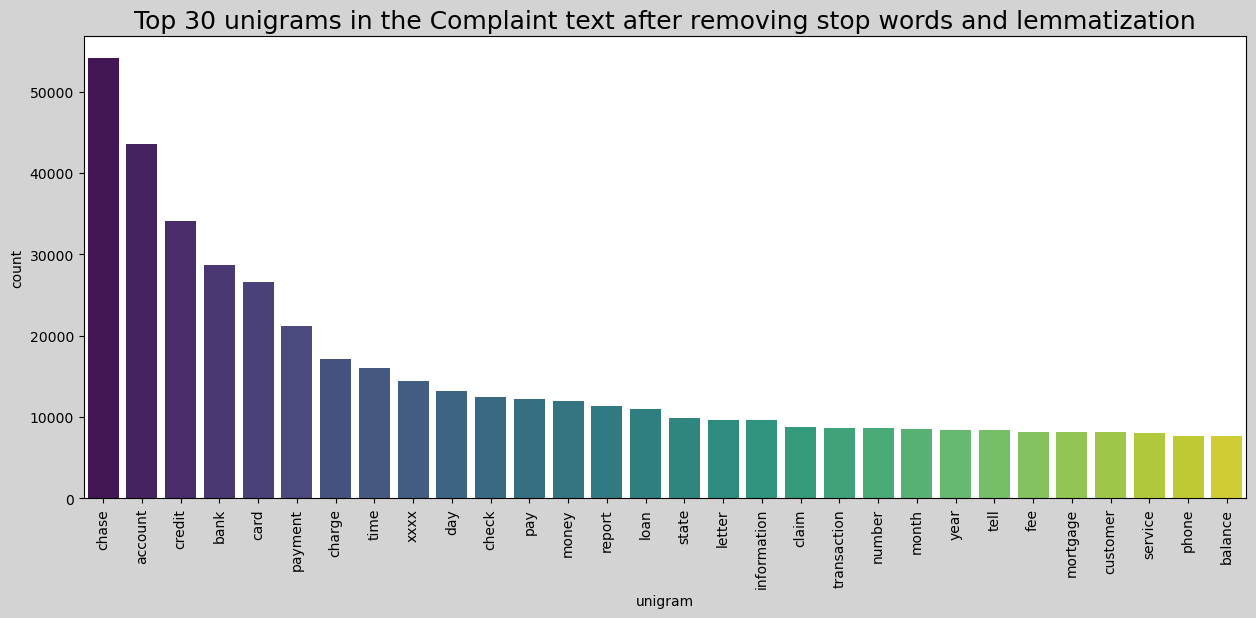

In [27]:
# Find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 unigrams by frequency among all the complaints
common_words = get_top_n_words(df_clean['complaint_POS_removed'].values.astype('U'), 30)
unigram_df = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

# Plot the top 30 unigrams
plt.figure(figsize=(15,6), facecolor='lightgray')
sns.barplot(x='unigram', y='count', data=unigram_df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 30 unigrams in the Complaint text after removing stop words and lemmatization", fontsize=18)
plt.show()

In [28]:
# Print the top 10 words in the unigram frequency
unigram_df.head(10)

,unigram,count
0,chase,54088
1,account,43603
2,credit,34084
3,bank,28639
4,card,26599
5,payment,21175
6,charge,17070
7,time,16065
8,xxxx,14380
9,day,13243


### <span style="color:grey">Observation:</span>

- A unigram refers to a single word within a text, used to analyze the frequency and distribution of individual words.
- Identified the top 30 most frequent unigrams in the complaints.



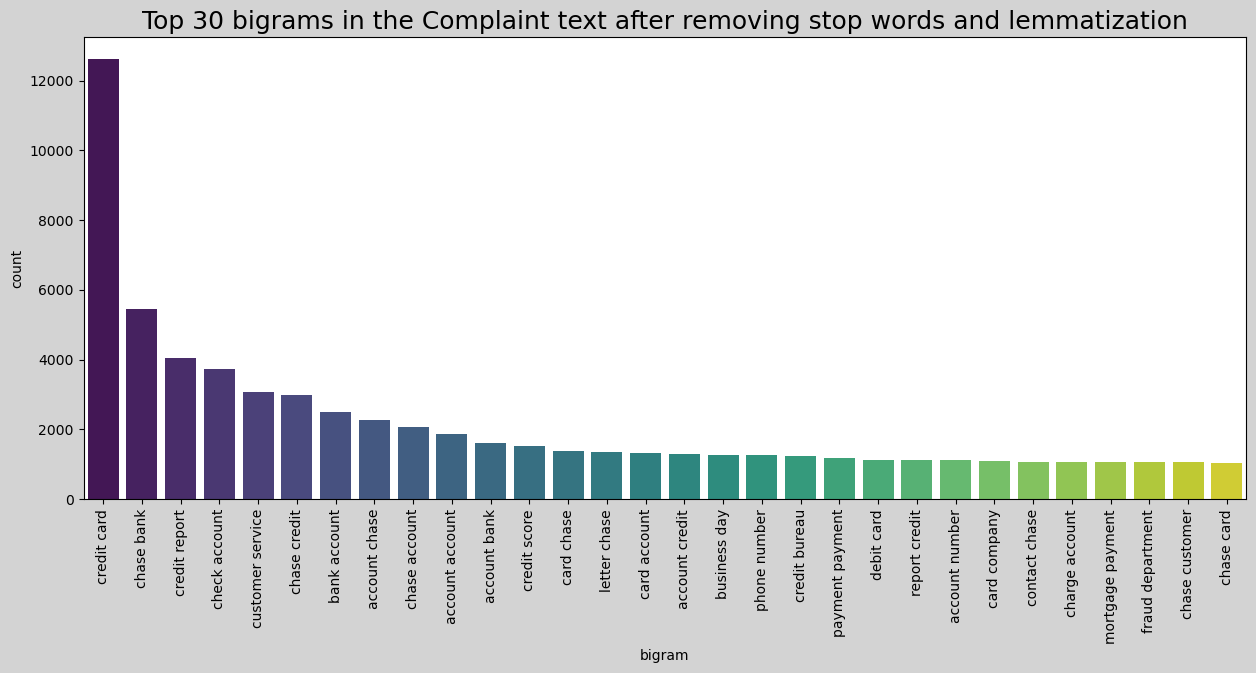

In [29]:
# Find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 bigrams by frequency among all the complaints
common_words = get_top_n_bigram(df_clean['Complaint_clean'].values.astype('U'), 30)
biagram_df = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

# Plot the top 30 bigrams
plt.figure(figsize=(15,6), facecolor='lightgray')
sns.barplot(x='bigram', y='count', data=biagram_df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 30 bigrams in the Complaint text after removing stop words and lemmatization", fontsize=18)
plt.show()

In [30]:
# Print the top 10 words in the bigram frequency
biagram_df.head(10)

,bigram,count
0,credit card,12610
1,chase bank,5456
2,credit report,4044
3,check account,3734
4,customer service,3074
5,chase credit,2992
6,bank account,2510
7,account chase,2284
8,chase account,2066
9,account account,1861


### <span style="color:grey">Observation:</span>

- A bigram is a pair of consecutive words in a text, useful for capturing immediate word associations and linguistic patterns.
- The top 30 most frequent bigrams were identified among the complaints.



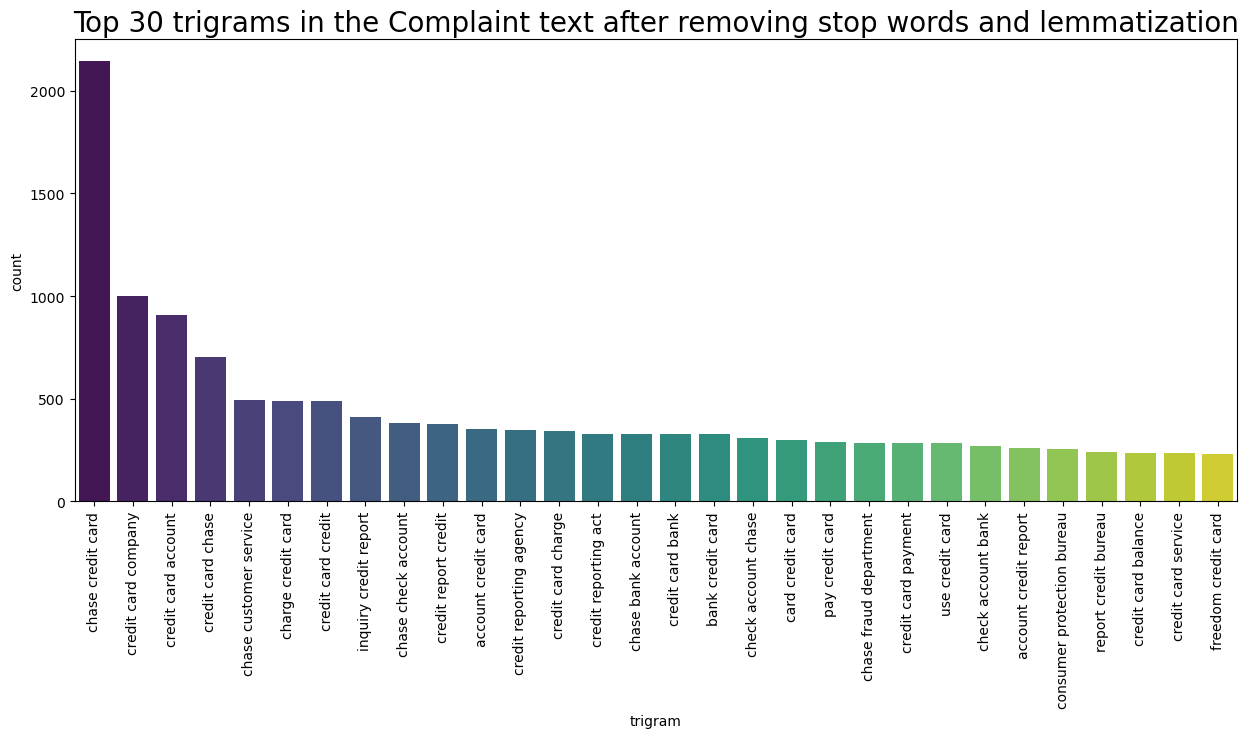

In [31]:
# Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 trigrams by frequency among all the complaints
common_words = get_top_n_trigram(df_clean['Complaint_clean'].values.astype('U'), 30)
trigram_df = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

# Plot the top 30 unigrams
plt.figure(figsize=(15,6))
sns.barplot(x='trigram', y='count', data=trigram_df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 30 trigrams in the Complaint text after removing stop words and lemmatization", fontsize=20)
plt.show()

In [32]:
# Print the top 10 words in the trigram frequency
trigram_df.head(10)

,trigram,count
0,chase credit card,2143
1,credit card company,1000
2,credit card account,906
3,credit card chase,703
4,chase customer service,494
5,charge credit card,491
6,credit card credit,490
7,inquiry credit report,411
8,chase check account,381
9,credit report credit,375


### <span style="color:grey">Observation:</span>
- A trigram is a set of three consecutive words in a text, used to capture contextual information and analyze text structure.
- Identified the top 30 trigrams based on their frequency in the complaints.


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [33]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [34]:
# All masked texts has been removed
df_clean.head(20)

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length,Complaint_clean
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead,xxxx card tell agent date information order upgrade account change anniversary date consent xxxx record agent mislead,117,card tell agent date information order upgrade account change anniversary date consent record agent mislead
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,81,card report application submit identity consent service credit identity applicant
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information xxxx offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application xxxx request proceed application tell chase chase fact credit account ...,429,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application request proceed application tell chase chase fact credit account name rep...
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank c

### <span style="color:grey">Observation:</span>
- Removed all masked texts

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [35]:
# Initialise the TfidfVectorizer 

# Remove common English stop words, ignore terms occurring in over 95% or in fewer than 2 documents, 
# enhancing the quality of the generated vectors.
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [36]:
# Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.Complaint_clean)

### <span style="color:grey">Observation:</span>


- TF-IDF vectorizer (`tfidf`) is fitted to the cleaned complaint text data (`df_clean.Complaint_clean`) and transformed it into a document-term matrix (DTM). It helps to convert the text data into numerical format.



## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task we will perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [37]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [38]:
# Load your nmf_model with the n_components i.e 5
num_topics = 5 # write the value you want to test out

# keep the random_state = 40
nmf_model = NMF(n_components=num_topics, random_state=40) 

In [39]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

7292

In [40]:
# Print the Top15 words for each of the topics
for index,topic in enumerate(nmf_model.components_):
    print(f'\033[1mThe Top 15 Words For Topic #{index + 1}', '\033[0m')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

The Top 15 Words For Topic #1 
['business', 'tell', 'claim', 'transfer', 'number', 'transaction', 'branch', 'day', 'fund', 'deposit', 'chase', 'money', 'check', 'bank', 'account']


The Top 15 Words For Topic #2 
['year', 'application', 'letter', 'limit', 'debt', 'bureau', 'information', 'score', 'company', 'account', 'chase', 'inquiry', 'report', 'card', 'credit']


The Top 15 Words For Topic #3 
['bank', 'document', 'foreclosure', 'sale', 'house', 'time', 'rate', 'letter', 'year', 'property', 'modification', 'chase', 'home', 'mortgage', 'loan']


The Top 15 Words For Topic #4 
['balance', 'statement', 'pay', 'service', 'refund', 'fraud', 'claim', 'merchant', 'purchase', 'transaction', 'dispute', 'chase', 'card', 'fee', 'charge']


The Top 15 Words For Topic #5 
['mortgage', 'year', 'account', 'credit', 'chase', 'date', 'time', 'auto', 'day', 'fee', 'statement', 'month', 'balance', 'pay', 'payment']




In [41]:
# Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)
topic_results[0].round(2)
topic_results[0].argmax()
topic_results.argmax(axis=1)

array([0, 1, 1, ..., 3, 4, 4])

In [42]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_results.argmax(axis = 1) # assign topics to each rows.

In [43]:
df_clean.head()

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,0
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead,xxxx card tell agent date information order upgrade account change anniversary date consent xxxx record agent mislead,117,card tell agent date information order upgrade account change anniversary date consent record agent mislead,1
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,81,card report application submit identity consent service credit identity applicant,1
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information xxxx offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application xxxx request proceed application tell chase chase fact credit account ...,429,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application request proceed application tell chase chase fact credit account name rep...,1
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear m

### <span style="color:grey">Observation:</span>
- Utilized a Non-negative Matrix Factorization (NMF) model (nmf_model) to identify 5 topics.

- Fit the NMF model to the document-term matrix (dtm), which contains TF-IDF scores for the terms in the complaint text data.

- Extracted the top 15 words associated with each topic.

- Assigned the dominant topic—i.e., the topic with the highest probability—to each complaint.

- Reviewed the initial rows of the df_clean DataFrame, which displays the assigned topics for each complaint.


In [44]:
# Print the first 5 Complaint for each of the Topics
df_clean5 = df_clean.groupby('Topic').head(5)
df_clean5.sort_values('Topic')

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,0
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to v...,grand son give check deposit chase account fund clear chase bank close account never pay money say need speek grand son check clear money take chase bank refuse pay money grand son call chase time tell call verify check owner country time date happen xxxx check number xxxx claim number xxxx chase,son check deposit chase account fund bank account money son check money bank refuse pay money son call time check owner country time date number claim number chase,163,son check deposit chase account fund bank account money son check money bank refuse pay money son call time check owner country time date number claim number chase,0
6,With out notice J.P. Morgan Chase restricted my account by my debit card Tuesday XX/XX/2019. On Thursday XX/XX/2019 I went into A branch after being advised by a customer service representative that my account would actually be closed. I went into the branch to see how I can remove the funds that are in there currently in as well as if my direc...,notice jp morgan chase restrict account debit card tuesday xxxx thursday xxxx go branch advise customer service representative account would actually close go branch see remove fund currently well direct deposit place employment would return bank associate customer service representative assure fund would post may take additional business day s...,jp restrict account debit card tuesday thursday branch customer service account branch fund deposit place employment bank customer service assure fund business day attempt branch fund look fund statement call tell business day state tuesday date fund bank teller chase mail check business day fund owe account bind fee rent car payment thing peac...,564,jp restrict account debit card tuesday thursday branch customer service account branch fund deposit place employment bank customer service assure fund business day attempt branch fund look fund statement call tell business day state tuesday date fund bank teller chase mail check business day fund owe account bind fee rent car payment thing peac...,0
10,mishandling of this account by Chase auto and XXXX.,mishandle account chase auto xxxx,account auto xxxx,17,account auto,0
12,I opened an account with chase bank on XXXX and used a code for XXXX bonus. I called to follow up on XX/XX/XXXX about the terms and was told everything was on the account and once I made XXXX direct deposit the bonus would be paid out in 10 days. As of XXXX I had made the required deposits and was told my account never had the coupon code appli...,

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [45]:
# Create the dictionary of Topic names and Topics
Topic_names = {0:"Bank Account services",
               1:"Credit card or prepaid card", 
               2:"Others",
               3:"Theft/Dispute Reporting",
               4:"Mortgage/Loan"}

# Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [46]:
df_clean

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,Bank Account services
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead,xxxx card tell agent date information order upgrade account change anniversary date consent xxxx record agent mislead,117,card tell agent date information order upgrade account change anniversary date consent record agent mislead,Credit card or prepaid card
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,81,card report application submit identity consent service credit identity applicant,Credit card or prepaid card
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information xxxx offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application xxxx request proceed application tell chase chase fact credit account ...,429,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application request proceed application tell chase chase fact credit account name rep...,Credit card or prepaid card

### <span style="color:grey">Observation:</span>

- The dictionary containing the top five entries, with topics labeled from 0 to 4, has replaced the integer labels in the "Topic" column of the df_clean DataFrame with their corresponding descriptive names.

- This transformation of numerical topic labels into clear, descriptive names enhances the interpretability and analysis of the topics associated with each complaint in the dataset.


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [47]:
# Create the dictionary again of Topic names and Topics
Topic_names = {"Bank Account services":0,
               "Credit card or prepaid card":1,
               "Others":2,
               "Theft/Dispute Reporting":3,
               "Mortgage/Loan":4}

# Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [48]:
df_clean

,complaint_what_happened,lemmatized_complaints,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,good morning name xxxx xxxx appreciate could help put stop chase bank cardmember service write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail every month attempt collect debt right know information consumer chase account xxxx xxxx xxxx xxxx thanks advance help,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,175,morning name appreciate chase bank cardmember service chase debt verification statement bank debt mail month attempt debt right information consumer chase account advance help,0
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,upgraded xxxx xxxx card xxxx tell agent upgrade anniversary date would change turned agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx without consent xxxx record agent mislead,xxxx card tell agent date information order upgrade account change anniversary date consent xxxx record agent mislead,117,card tell agent date information order upgrade account change anniversary date consent record agent mislead,1
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card report xxxx however fraudulent application submit identity without consent fraudulently obtain service extend credit without verify identity applicant,card report application submit identity consent service credit identity applicant,81,card report application submit identity consent service credit identity applicant,1
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",xxxx try book xxxx xxxx ticket come across offer apply towards ticket apply reward card put information offer within less minute notified via screen decision could make immediately contacted xxxx refer chase bank immediately contact chase bank within minute get notification screen tell chase representative spoke application deny could state ask...,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information xxxx offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application xxxx request proceed application tell chase chase fact credit account ...,429,try book ticket come offer apply ticket card information offer decision bank chase bank get notification screen spoke application deny state information offer credit offer account statement purchase ticket get deny account application withdrawn oblige happen application request proceed application tell chase chase fact credit account name rep...,1
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear m

In [49]:
# Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[["complaint_what_happened","Topic"]]

In [50]:
training_data.head(10)

,complaint_what_happened,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to c...,0
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was m...,1
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",1
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chas...",1
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to v...,0
5,Can you please remove inquiry,1
6,With out notice J.P. Morgan Chase restricted my account by my debit card Tuesday XX/XX/2019. On Thursday XX/XX/2019 I went into A branch after being advised by a customer service representative that my account would actually be closed. I went into the branch to see how I can remove the funds that are in there currently in as well as if my direc...,0
7,"During the summer months, I experience a decline income due to my employment. Therefore, I request a one month payment extension with my Auto Loan Company, Chase. For the past almost fours years, my request for payment extension is granted. I have never been delinquent with my auto loan payment. However, On XX/XX/2019 my request for a one month...",4
8,"On XXXX XX/XX/2019, I made a {$300.00} payment to an online retailer using Chase quick pay with XXXX on the Chase website. I realized that this was a scam website after no confirmation, product, or response to any inquiries regarding the order and contacted Chase to get more information about the transaction to attempt getting a refund through ...",3
9,I have a Chase credit card which is incorrectly reporting data on my credit report. The company is not helping resolve the issue.,1


### <span style="color:grey">Observation:</span>

- The trained model is now set to classify new complaints.

- To meet the requirements of supervised learning, topic names have been successfully converted into numerical values.

- The data for supervised learning is now prepared.

- We have a df_clean DataFrame that contains only the "complaint_what_happened" text and their corresponding numerical topic labels.


#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [51]:
# Write your code to get the Vector count
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.complaint_what_happened)

# Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [52]:
from sklearn.model_selection import train_test_split

# Performing Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.25, random_state=42)

print(f"Shape of X_train:\033[1m {X_train.shape}", '\033[0m')
print(f"Shape of y_train:\033[1m {y_train.shape}", '\033[0m')
print(f"Shape of X_test:\033[1m {X_test.shape}", '\033[0m')
print(f"Shape of y_test:\033[1m {y_test.shape}", '\033[0m')

Shape of X_train: (15804, 29725) 
Shape of y_train: (15804,) 
Shape of X_test: (5268, 29725) 
Shape of y_test: (5268,) 


### <span style="color:grey">Observation:</span>

- The training data is processed using a CountVectorizer to generate a matrix of token counts from the text data.

- The word vectors are effectively converted into Term Frequency-Inverse Document Frequency (TF-IDF) vectors, highlighting the significance of each word within the overall document corpus.

- The data is divided into training (75%) and testing (25%) sets.


We have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

## Custom GridSearchCV Utility functions

In [53]:
# utility function for GridSearchCV
def grid_search(model,folds,params,scoring):
    
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search

# utility function to display the best score and parameters of the GridSearchCV model
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

In [54]:
def eval_and_display_classification_report(model, metric, model_name):
    
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    roc_auc_score_train = round(roc_auc_score(y_train, y_train_pred_proba,average='weighted',multi_class='ovr'),2)
    roc_auc_score_test = round(roc_auc_score(y_test, y_test_pred_proba,average='weighted',multi_class='ovr'),2)
    print("ROC AUC Score Train:", roc_auc_score_train)
    print("ROC AUC Score Test:", roc_auc_score_test)
    metric.append(roc_auc_score_train)
    metric.append(roc_auc_score_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  
    precision_train,recall_train,fscore_train,support_train=precision_recall_fscore_support(y_train,y_train_pred,average='weighted')
    precision_test,recall_test,fscore_test,support_test=precision_recall_fscore_support(y_test,y_test_pred,average='weighted')
    
    acc_score_train = round(accuracy_score(y_train,y_train_pred),2)
    acc_score_test = round(accuracy_score(y_test,y_test_pred),2)
    
    metric.append(acc_score_train)
    metric.append(acc_score_test)
    metric.append(round(precision_train,2))
    metric.append(round(precision_test,2))
    metric.append(round(recall_train,2))
    metric.append(round(recall_test,2))
    metric.append(round(fscore_train,2))
    metric.append(round(fscore_test,2))
    
    print('Train Accuracy :',acc_score_train)
    print('Test Accuracy :',acc_score_test)

    print(f"\033[1mCLASSIFICATION REPORT for {model_name}\n", '\033[0m')
    model_report_train = classification_report(y_train,y_train_pred, target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
    model_report_test = classification_report(y_test,y_test_pred, target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
    
    print('Classification Report for Train:\n',model_report_train)
    print('Classification Report for Test:\n',model_report_test)

    #plt.title(f"CONFUSION MATRIX for {model_name}\n")
    # plot confusion matrix of the classifier
    plt.figure(figsize=(5,5))
    plt.title(f"CONFUSION MATRIX for {model_name}\n")
    matrix = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(matrix, annot=True, cbar=None, cmap="Blues", fmt='d', xticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"], yticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting","Mortgage/Loan"])
    plt.show()

## Stratified KFold Cross Validation

In [55]:
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

In [56]:
table = {'Metric': ['ROC_AUC Score(Train)','ROC_AUC Score(Test)',
                    'Accuracy(Train)','Accuracy(Test)',
                    'Precision(Train)','Precision(Test)',
                    'Recall(Train)','Recall(Test)',
                    'F1-Score(Train)','F1-Score(Test)'
                   ] }
table_df = pd.DataFrame(table ,columns = ['Metric'])
final_metric =  pd.concat([table_df], axis=1)

### Model 1: Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Run the Logistic Regression model
model_name = 'Logistic Regression'
clf_lr = LogisticRegression(solver='liblinear')
%time 
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 8.82 μs


ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.99
Train Accuracy : 0.96
Test Accuracy : 0.91
CLASSIFICATION REPORT for Logistic Regression
 
Classification Report for Train:
                              precision    recall  f1-score   support

      Bank Account services       0.95      0.98      0.96      4016
Credit card or prepaid card       0.96      0.97      0.96      3748
                     Others       0.97      0.97      0.97      2894
    Theft/Dispute Reporting       0.96      0.95      0.95      3465
              Mortgage/Loan       0.98      0.89      0.93      1681

                   accuracy                           0.96     15804
                  macro avg       0.96      0.95      0.96     15804
               weighted avg       0.96      0.96      0.96     15804

Classification Report for Test:
                              precision    recall  f1-score   support

      Bank Account services       0.90      0.94      0.92      1364
Credit card or prepaid card  

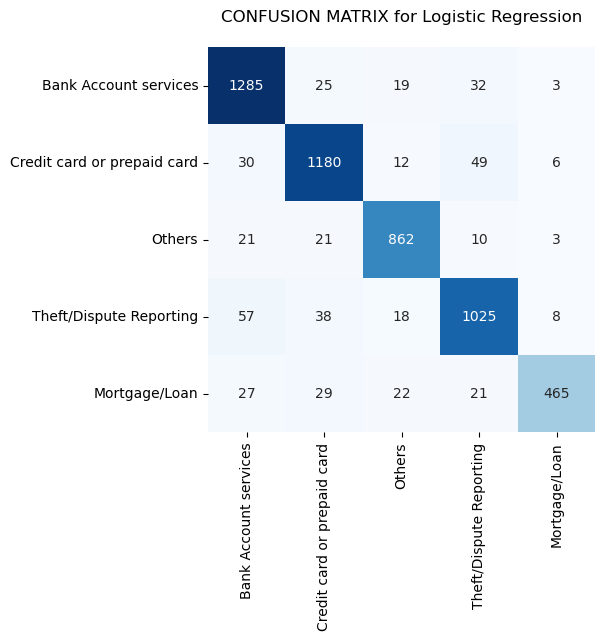

,Metric,Logistic Regression
0,ROC_AUC Score(Train),1.00
1,ROC_AUC Score(Test),0.99
2,Accuracy(Train),0.96
3,Accuracy(Test),0.91
4,Precision(Train),0.96
5,Precision(Test),0.92
6,Recall(Train),0.96
7,Recall(Test),0.91
8,F1-Score(Train),0.96
9,F1-Score(Test),0.91


In [58]:
metrics=[]
eval_and_display_classification_report(clf_lr,metrics, model_name)
model_series = pd.Series(metrics, name = model_name)
final_metric = pd.concat([final_metric, model_series], axis=1)
final_metric

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Score:  0.9410275149267777
Best Hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
ROC AUC Score Train: 1.0
ROC AUC Score Test: 1.0
Train Accuracy : 0.96
Test Accuracy : 0.94
CLASSIFICATION REPORT for Logistic Regression with GridSearchCV
 
Classification Report for Train:
                              precision    recall  f1-score   support

      Bank Account services       0.96      0.97      0.96      4016
Credit card or prepaid card       0.96      0.96      0.96      3748
                     Others       0.95      0.96      0.96      2894
    Theft/Dispute Reporting       0.95      0.94      0.95      3465
              Mortgage/Loan       0.97      0.94      0.95      1681

                   accuracy                           0.96     15804
                  macro avg       0.96      0.95      0.96     15804
               weighted avg       0.96      0.96      0.96     15804

Classification Report for Test:
                              precision    recall  f1

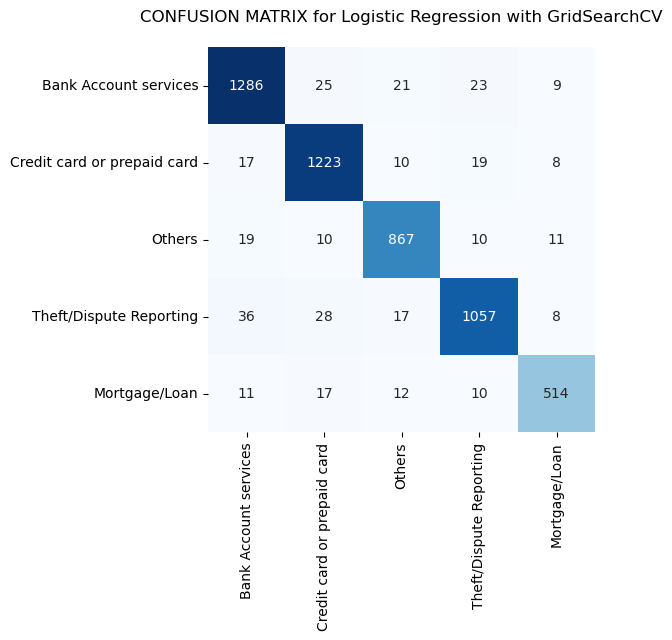

,Metric,Logistic Regression,Logistic Regression with GridSearchCV
0,ROC_AUC Score(Train),1.00,1.00
1,ROC_AUC Score(Test),0.99,1.00
2,Accuracy(Train),0.96,0.96
3,Accuracy(Test),0.91,0.94
4,Precision(Train),0.96,0.96
5,Precision(Test),0.92,0.94
6,Recall(Train),0.96,0.96
7,Recall(Test),0.91,0.94
8,F1-Score(Train),0.96,0.96
9,F1-Score(Test),0.91,0.94


In [59]:
# Logistic Regression with GridSearchCV

# logistic regression
log_reg = LogisticRegression()

# hyperparameter for Logistic Regression
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }

# create gridsearch object
clf_lr_tuned = grid_search(log_reg, folds, log_params, scoring=None)

# fit model
clf_lr_tuned.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(clf_lr_tuned)

model_name = 'Logistic Regression with GridSearchCV'
metrics=[]
eval_and_display_classification_report(clf_lr_tuned, metrics, model_name)
model_series = pd.Series(metrics, name = model_name)
final_metric = pd.concat([final_metric, model_series], axis=1)
final_metric
#eval_model(y_test, y_pred_rf_tuned, model_name)

### <span style="color:grey">Observation:</span>

- Implemented Logistic Regression for classification using default hyperparameters.

- Fine-tuned the model with hyperparameters and retrained it.

- Generated predictions with the optimized model, resulting in an improved F1 score compared to the default model.


### Model 2: Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Run Decision Tree on default hyperparameters
model_name = 'Decision Tree Classifier'
clf_dt = DecisionTreeClassifier()
%time 
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

CPU times: user 11 μs, sys: 4 μs, total: 15 μs
Wall time: 8.11 μs


ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.86
Train Accuracy : 1.0
Test Accuracy : 0.78
CLASSIFICATION REPORT for Decision Tree Classifier
 
Classification Report for Train:
                              precision    recall  f1-score   support

      Bank Account services       1.00      1.00      1.00      4016
Credit card or prepaid card       1.00      1.00      1.00      3748
                     Others       1.00      1.00      1.00      2894
    Theft/Dispute Reporting       1.00      1.00      1.00      3465
              Mortgage/Loan       1.00      1.00      1.00      1681

                   accuracy                           1.00     15804
                  macro avg       1.00      1.00      1.00     15804
               weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
                              precision    recall  f1-score   support

      Bank Account services       0.80      0.79      0.79      1364
Credit card or prepaid ca

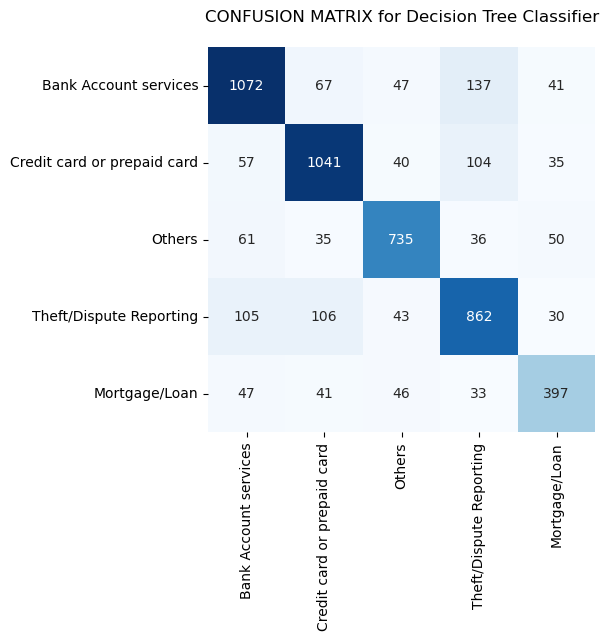

,Metric,Logistic Regression,Logistic Regression with GridSearchCV,Decision Tree Classifier
0,ROC_AUC Score(Train),1.00,1.00,1.00
1,ROC_AUC Score(Test),0.99,1.00,0.86
2,Accuracy(Train),0.96,0.96,1.00
3,Accuracy(Test),0.91,0.94,0.78
4,Precision(Train),0.96,0.96,1.00
5,Precision(Test),0.92,0.94,0.78
6,Recall(Train),0.96,0.96,1.00
7,Recall(Test),0.91,0.94,0.78
8,F1-Score(Train),0.96,0.96,1.00
9,F1-Score(Test),0.91,0.94,0.78


In [61]:
metrics =[]
eval_and_display_classification_report(clf_dt, metrics, model_name)
model_series = pd.Series(metrics, name = model_name)
final_metric = pd.concat([final_metric, model_series], axis=1)
final_metric

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score:  0.9376762010700018
Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 30}
ROC AUC Score Train: 0.97
ROC AUC Score Test: 0.94
Train Accuracy : 0.83
Test Accuracy : 0.8
CLASSIFICATION REPORT for Decision Tree Classifier with GridSearchCV
 
Classification Report for Train:
                              precision    recall  f1-score   support

      Bank Account services       0.85      0.85      0.85      4016
Credit card or prepaid card       0.84      0.88      0.86      3748
                     Others       0.82      0.85      0.84      2894
    Theft/Dispute Reporting       0.83      0.78      0.81      3465
              Mortgage/Loan       0.82      0.76      0.79      1681

                   accuracy                           0.83     15804
                  macro avg       0.83      0.83      0.83     15804
               weighted avg       0.83      0.83      0.83     15804

Classification Repor

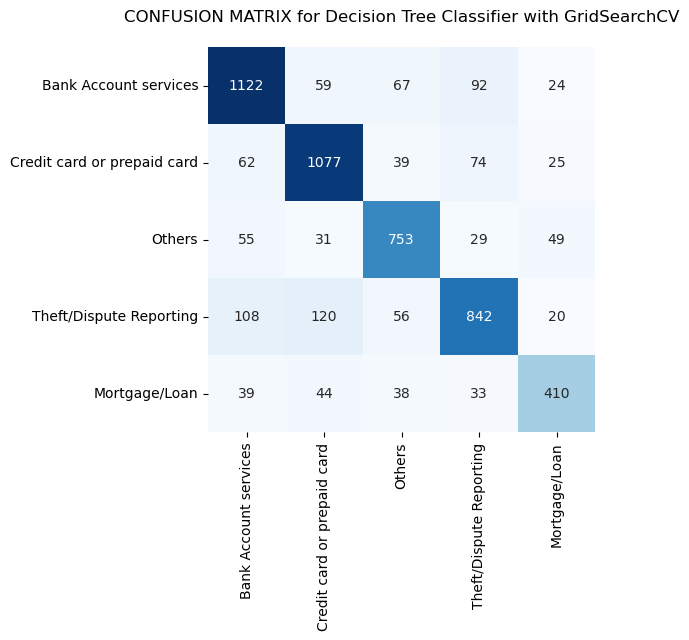

,Metric,Logistic Regression,Logistic Regression with GridSearchCV,Decision Tree Classifier,Decision Tree Classifier with GridSearchCV
0,ROC_AUC Score(Train),1.00,1.00,1.00,0.97
1,ROC_AUC Score(Test),0.99,1.00,0.86,0.94
2,Accuracy(Train),0.96,0.96,1.00,0.83
3,Accuracy(Test),0.91,0.94,0.78,0.80
4,Precision(Train),0.96,0.96,1.00,0.83
5,Precision(Test),0.92,0.94,0.78,0.80
6,Recall(Train),0.96,0.96,1.00,0.83
7,Recall(Test),0.91,0.94,0.78,0.80
8,F1-Score(Train),0.96,0.96,1.00,0.83
9,F1-Score(Test),0.91,0.94,0.78,0.80


In [62]:
# Decision Tree Classification wuth GridSearchCV

dtc = DecisionTreeClassifier(random_state=40)

dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}

# create gridsearch object
clf_dt_tuned = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')

# fit model
clf_dt_tuned.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(clf_dt_tuned)

# Random Forest Classification Report
model_name = 'Decision Tree Classifier with GridSearchCV'
metrics=[]
eval_and_display_classification_report(clf_dt_tuned, metrics, model_name)
model_series = pd.Series(metrics, name = model_name)
final_metric = pd.concat([final_metric, model_series], axis=1)
final_metric

### <span style="color:grey">Observation:</span>

- A Decision Tree was employed for classification using the default hyperparameters.

- The model was then fine-tuned with the hyperparameters and retrained.

- Predictions were made using the tuned model, resulting in an improved F1 score compared to the default model.

### Model 3: Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Run the Random Forest model on default hyperparameters
model_name = 'Random Tree Classifier'
clf_rf = RandomForestClassifier()
%time 
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

CPU times: user 6 μs, sys: 4 μs, total: 10 μs
Wall time: 6.91 μs


ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.97
Train Accuracy : 1.0
Test Accuracy : 0.83
CLASSIFICATION REPORT for Random Tree Classifier
 
Classification Report for Train:
                              precision    recall  f1-score   support

      Bank Account services       1.00      1.00      1.00      4016
Credit card or prepaid card       1.00      1.00      1.00      3748
                     Others       1.00      1.00      1.00      2894
    Theft/Dispute Reporting       1.00      1.00      1.00      3465
              Mortgage/Loan       1.00      1.00      1.00      1681

                   accuracy                           1.00     15804
                  macro avg       1.00      1.00      1.00     15804
               weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
                              precision    recall  f1-score   support

      Bank Account services       0.81      0.93      0.86      1364
Credit card or prepaid card

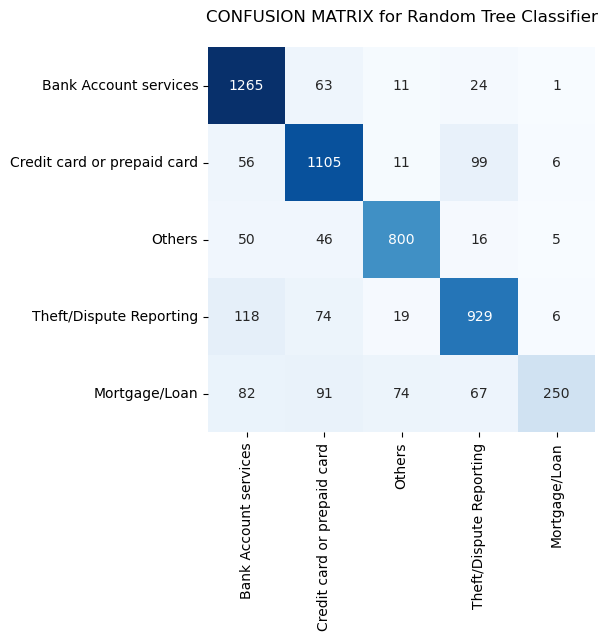

,Metric,Logistic Regression,Logistic Regression with GridSearchCV,Decision Tree Classifier,Decision Tree Classifier with GridSearchCV,Random Tree Classifier
0,ROC_AUC Score(Train),1.00,1.00,1.00,0.97,1.00
1,ROC_AUC Score(Test),0.99,1.00,0.86,0.94,0.97
2,Accuracy(Train),0.96,0.96,1.00,0.83,1.00
3,Accuracy(Test),0.91,0.94,0.78,0.80,0.83
4,Precision(Train),0.96,0.96,1.00,0.83,1.00
5,Precision(Test),0.92,0.94,0.78,0.80,0.83
6,Recall(Train),0.96,0.96,1.00,0.83,1.00
7,Recall(Test),0.91,0.94,0.78,0.80,0.83
8,F1-Score(Train),0.96,0.96,1.00,0.83,1.00
9,F1-Score(Test),0.91,0.94,0.78,0.80,0.82


In [64]:
metrics =[]
eval_and_display_classification_report(clf_rf, metrics, model_name)
model_series = pd.Series(metrics, name = model_name)
final_metric = pd.concat([final_metric, model_series], axis=1)
final_metric

In [65]:
# Random Forest Classifier with GridSearchCV

rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)

# hyperparameters for Random Forest
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,300,500]
        }

# create gridsearch object
clf_rf_tuned = grid_search(rfc, folds, rfc_params, scoring='roc_auc_ovr')
%time

# fit model
clf_rf_tuned.fit(X_train, y_train)

# oob score
print('OOB SCORE :',clf_rf_tuned.best_estimator_.oob_score_)

# print best hyperparameters
print_best_score_params(clf_rf_tuned)



CPU times: user 7 μs, sys: 3 μs, total: 10 μs
Wall time: 5.96 μs
Fitting 5 folds for each of 80 candidates, totalling 400 fits
OOB SCORE : 0.80403695267021
Best Score:  0.9758349151174566
Best Hyperparameters:  {'max_depth': 40, 'min_samples_leaf': 5, 'n_estimators': 500}


ROC AUC Score Train: 0.99
ROC AUC Score Test: 0.97
Train Accuracy : 0.91
Test Accuracy : 0.8
CLASSIFICATION REPORT for Random Forest Classifier with GridSearchCV
 
Classification Report for Train:
                              precision    recall  f1-score   support

      Bank Account services       0.90      0.97      0.93      4016
Credit card or prepaid card       0.86      0.96      0.91      3748
                     Others       0.93      0.91      0.92      2894
    Theft/Dispute Reporting       0.94      0.94      0.94      3465
              Mortgage/Loan       1.00      0.59      0.74      1681

                   accuracy                           0.91     15804
                  macro avg       0.93      0.87      0.89     15804
               weighted avg       0.92      0.91      0.91     15804

Classification Report for Test:
                              precision    recall  f1-score   support

      Bank Account services       0.78      0.92      0.85      1364
Credit

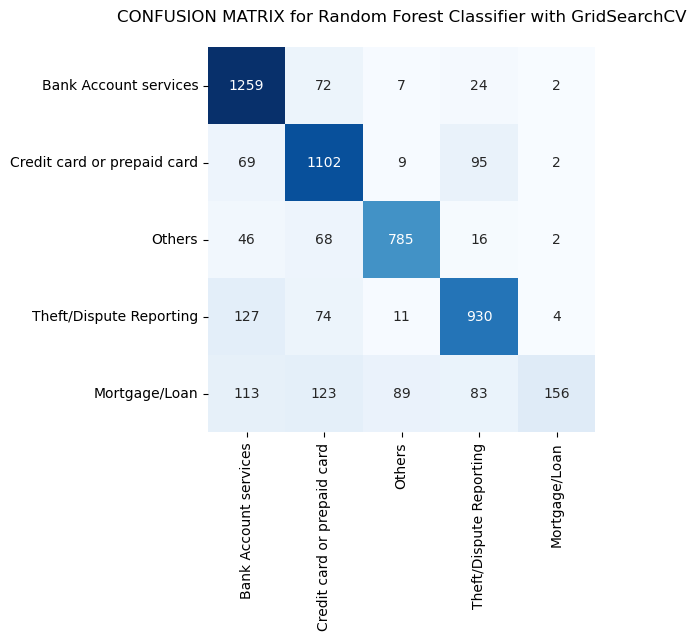

,Metric,Logistic Regression,Logistic Regression with GridSearchCV,Decision Tree Classifier,Decision Tree Classifier with GridSearchCV,Random Tree Classifier,Random Forest Classifier with GridSearchCV
0,ROC_AUC Score(Train),1.00,1.00,1.00,0.97,1.00,0.99
1,ROC_AUC Score(Test),0.99,1.00,0.86,0.94,0.97,0.97
2,Accuracy(Train),0.96,0.96,1.00,0.83,1.00,0.91
3,Accuracy(Test),0.91,0.94,0.78,0.80,0.83,0.80
4,Precision(Train),0.96,0.96,1.00,0.83,1.00,0.92
5,Precision(Test),0.92,0.94,0.78,0.80,0.83,0.82
6,Recall(Train),0.96,0.96,1.00,0.83,1.00,0.91
7,Recall(Test),0.91,0.94,0.78,0.80,0.83,0.80
8,F1-Score(Train),0.96,0.96,1.00,0.83,1.00,0.91
9,F1-Score(Test),0.91,0.94,0.78,0.80,0.82,0.79


In [66]:
# Random Forest Classification Report
metrics=[]
model_name = 'Random Forest Classifier with GridSearchCV'
eval_and_display_classification_report(clf_rf_tuned, metrics, model_name)
model_series = pd.Series(metrics, name = model_name)
final_metric = pd.concat([final_metric, model_series], axis=1)
final_metric

### <span style="color:grey">Observation:</span>

- Employed Random Forest for classification with default hyperparameters.

- Fine-tuned the model using hyperparameters then retrained it.

- Made predictions with the optimized model and found that the F1 score improved compared to the default model.

# **Model inference**
#### **Consolidated view of all the models and their metrics**

In [67]:
final_metric

,Metric,Logistic Regression,Logistic Regression with GridSearchCV,Decision Tree Classifier,Decision Tree Classifier with GridSearchCV,Random Tree Classifier,Random Forest Classifier with GridSearchCV
0,ROC_AUC Score(Train),1.00,1.00,1.00,0.97,1.00,0.99
1,ROC_AUC Score(Test),0.99,1.00,0.86,0.94,0.97,0.97
2,Accuracy(Train),0.96,0.96,1.00,0.83,1.00,0.91
3,Accuracy(Test),0.91,0.94,0.78,0.80,0.83,0.80
4,Precision(Train),0.96,0.96,1.00,0.83,1.00,0.92
5,Precision(Test),0.92,0.94,0.78,0.80,0.83,0.82
6,Recall(Train),0.96,0.96,1.00,0.83,1.00,0.91
7,Recall(Test),0.91,0.94,0.78,0.80,0.83,0.80
8,F1-Score(Train),0.96,0.96,1.00,0.83,1.00,0.91
9,F1-Score(Test),0.91,0.94,0.78,0.80,0.82,0.79


#### From the above summary table, we observe that the `tuned Logistic Regression` performs the best among all that we tried.

In [68]:
# Function to predict a topic for given text
def predict_topic(text):
    
    target_names = ["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting", "Mortgage/Loan"]

    X_new_counts = count_vect.transform(text)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = clf_lr_tuned.predict(X_new_tfidf)

    return target_names[predicted[0]]

In [69]:
# Create a dataframe of some sample customer complaints

df_new = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs", 
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "Yesterday, I received a fraudulent email regarding renewal of my services.",
                                  "What is the procedure to know my CIBIL score?",
                                  "I need to know the number of bank branches and their locations in the city of Dubai"]})
df_new

,complaints
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs"
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.
2,I want to open a salary account at your downtown branch. Please provide me the procedure.
3,"Yesterday, I received a fraudulent email regarding renewal of my services."
4,What is the procedure to know my CIBIL score?
5,I need to know the number of bank branches and their locations in the city of Dubai


In [70]:
# Create a new column of predicted topics of each complaint, predicted using the tuned Logistic Regression model
df_new['predicted topic'] = df_new['complaints'].apply(lambda x: predict_topic([x]))
df_new

,complaints,predicted topic
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs",Others
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.,Credit card or prepaid card
2,I want to open a salary account at your downtown branch. Please provide me the procedure.,Bank Account services
3,"Yesterday, I received a fraudulent email regarding renewal of my services.",Theft/Dispute Reporting
4,What is the procedure to know my CIBIL score?,Others
5,I need to know the number of bank branches and their locations in the city of Dubai,Bank Account services


### <span style="color:grey">Observation:</span>

- Finally, df_new showed the newly added 'predicted topic' and it matched our expectations. 
- Best Score:  0.9758349151174566
